In [259]:
import radiomics as rm
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Data preprocessing

In [260]:
df_cancer = pd.read_csv('features.csv', sep=';')

In [261]:
df_cancer.head()

,Unnamed: 0,original_shape_Elongation,original_shape_Flatness,original_shape_LeastAxisLength,original_shape_MajorAxisLength,original_shape_Maximum2DDiameterColumn,original_shape_Maximum2DDiameterRow,original_shape_Maximum2DDiameterSlice,original_shape_Maximum3DDiameter,original_shape_MeshVolume,...,original_gldm_GrayLevelVariance,original_gldm_HighGrayLevelEmphasis,original_gldm_LargeDependenceEmphasis,original_gldm_LargeDependenceHighGrayLevelEmphasis,original_gldm_LargeDependenceLowGrayLevelEmphasis,original_gldm_LowGrayLevelEmphasis,original_gldm_SmallDependenceEmphasis,original_gldm_SmallDependenceHighGrayLevelEmphasis,original_gldm_SmallDependenceLowGrayLevelEmphasis,metastases
0,0,0.730057,0.547390,46.111107,84.238088,94.916393,82.904318,95.048181,95.453350,156058.192253,...,65.890341,1583.334962,64.282088,114939.612603,0.102407,0.002637,0.186916,206.427211,0.000523,0.0
1,1,0.880026,0.755086,70.050510,92.771551,116.811054,101.661967,103.566608,125.188825,359165.698933,...,88.444688,1651.377715,76.437748,142846.540839,0.052014,0.001332,0.142663,165.984345,0.000334,0.0
2,2,0.541368,0.349893,25.216240,72.068431,56.708364,83.506157,62.535632,83.967822,34629.834720,...,99.383954,1355.354470,25.568303,43154.784522,0.019421,0.001525,0.304123,311.508421,0.000710,2.0
3,3,0.490820,0.287317,30.821869,107.274834,110.729228,110.003931,68.533539,117.543366,84214.687347,...,43.820066,1533.333966,40.228007,68201.600149,0.026679,0.001167,0.202153,253.308845,0.000398,2.0
4,4,0.710922,0.448589,35.245066,78.568642,77.737209,87.455405,85.094400,103.629893,83150.790783,...,56.427838,1785.882712,43.938237,85015.211818,0.027079,0.001295,0.193209,277.260954,0.000468,0.0


In [262]:
df_cancer.isnull().sum()

Unnamed: 0                                            0
original_shape_Elongation                             0
original_shape_Flatness                               0
original_shape_LeastAxisLength                        0
original_shape_MajorAxisLength                        0
                                                     ..
original_gldm_LowGrayLevelEmphasis                    0
original_gldm_SmallDependenceEmphasis                 0
original_gldm_SmallDependenceHighGrayLevelEmphasis    0
original_gldm_SmallDependenceLowGrayLevelEmphasis     0
metastases                                            0
Length: 102, dtype: int64

In [263]:
df_cancer.dtypes

Unnamed: 0                                              int64
original_shape_Elongation                             float64
original_shape_Flatness                               float64
original_shape_LeastAxisLength                        float64
original_shape_MajorAxisLength                        float64
                                                       ...   
original_gldm_LowGrayLevelEmphasis                    float64
original_gldm_SmallDependenceEmphasis                 float64
original_gldm_SmallDependenceHighGrayLevelEmphasis    float64
original_gldm_SmallDependenceLowGrayLevelEmphasis     float64
metastases                                            float64
Length: 102, dtype: object

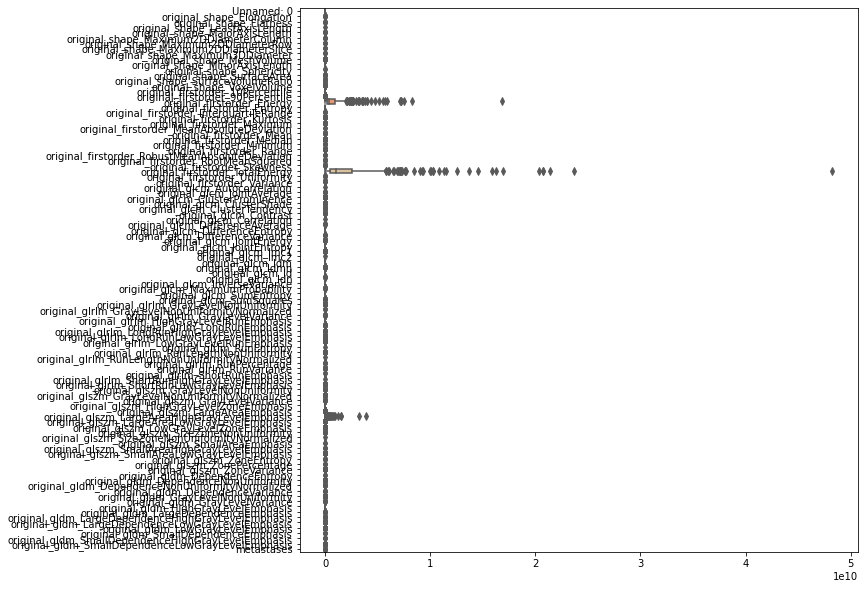

In [264]:
## variables distribution visualization
plt.figure(figsize=(10,10))
ax = sns.boxplot(data=df_cancer, orient="h", palette="Set2")

In [265]:
cancer_info = pd.read_csv('NSCLC Radiomics Lung1.clinical-version3-Oct 2019.csv')
# cancer_info_10 = cancer_info[:10]
# cancer_info_10

In [266]:
df_cancer = df_cancer.join(cancer_info)
df_cancer.isnull().sum()

Unnamed: 0                         0
original_shape_Elongation          0
original_shape_Flatness            0
original_shape_LeastAxisLength     0
original_shape_MajorAxisLength     0
                                  ..
Overall.Stage                      1
Histology                         42
gender                             0
Survival.time                      0
deadstatus.event                   0
Length: 112, dtype: int64

In [267]:
df_cancer['age'] = df_cancer['age'].fillna(df_cancer['age'].median())
df_cancer.dropna(inplace = True)

In [268]:
df_cancer = df_cancer.drop(['Unnamed: 0', 'PatientID'], axis=1)

In [269]:
X_cat = df_cancer.select_dtypes(include = 'object')
X_cat

,Overall.Stage,Histology,gender
0,IIIb,large cell,male
1,I,squamous cell carcinoma,male
2,IIIb,large cell,male
3,II,squamous cell carcinoma,male
4,IIIb,squamous cell carcinoma,male
...,...,...,...
416,IIIb,squamous cell carcinoma,male
417,I,adenocarcinoma,male
418,IIIb,squamous cell carcinoma,male
419,II,squamous cell carcinoma,male


In [270]:
from sklearn.preprocessing import LabelEncoder

lb_make = LabelEncoder()
df_cancer["gender"] = lb_make.fit_transform(df_cancer["gender"])

## Trying random forest with hyperparameters customization for the traget Histology

In [271]:
seg = df_cancer['Histology']
dum = pd.get_dummies(df_cancer.loc[:, df_cancer.columns != 'Histology'] )
dum['Histology'] = seg
df_cancer = dum

In [272]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df_cancer, random_state=0)

X_train = train.loc[:, train.columns != 'Histology']
y_train = train['Histology']

X_test = test.loc[:, train.columns != 'Histology']
y_test = test['Histology']

In [273]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
# define models and parameters
model = RandomForestClassifier()
n_estimators = [10, 100, 1000]
max_features = ['sqrt', 'log2']
# define grid search
grid = dict(n_estimators=n_estimators,max_features=max_features)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(df_cancer.loc[:, df_cancer.columns != 'Histology'], df_cancer['Histology'])
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.373969 using {'max_features': 'log2', 'n_estimators': 1000}
0.349194 (0.074979) with: {'max_features': 'sqrt', 'n_estimators': 10}
0.373044 (0.076403) with: {'max_features': 'sqrt', 'n_estimators': 100}
0.371337 (0.063357) with: {'max_features': 'sqrt', 'n_estimators': 1000}
0.308606 (0.066782) with: {'max_features': 'log2', 'n_estimators': 10}
0.366809 (0.048405) with: {'max_features': 'log2', 'n_estimators': 100}
0.373969 (0.064389) with: {'max_features': 'log2', 'n_estimators': 1000}


In [274]:
rnd_clf = RandomForestClassifier(n_estimators=500, n_jobs=-1)
rnd_clf.fit(X_train, y_train)

for name, score in zip(df_cancer.columns, rnd_clf.feature_importances_):
  print(name, score)

original_shape_Elongation 0.013859932694491602
original_shape_Flatness 0.014708711268355965
original_shape_LeastAxisLength 0.008826680087423482
original_shape_MajorAxisLength 0.017801069625465404
original_shape_Maximum2DDiameterColumn 0.012342761098640897
original_shape_Maximum2DDiameterRow 0.014048290569744756
original_shape_Maximum2DDiameterSlice 0.01206427989341124
original_shape_Maximum3DDiameter 0.015627680062997692
original_shape_MeshVolume 0.006747453744799773
original_shape_MinorAxisLength 0.009001987187401701
original_shape_Sphericity 0.013755737910705642
original_shape_SurfaceArea 0.009430665103320891
original_shape_SurfaceVolumeRatio 0.009221275312230635
original_shape_VoxelVolume 0.00682778042709487
original_firstorder_10Percentile 0.01010571212964589
original_firstorder_90Percentile 0.014205427591901914
original_firstorder_Energy 0.009131155472165824
original_firstorder_Entropy 0.007299912495629749
original_firstorder_InterquartileRange 0.007077018316033559
original_firsto

In [275]:
rf = RandomForestClassifier(n_estimators= 1000, max_features='sqrt', random_state=0)
rf.fit(X_train, y_train)

RandomForestClassifier(max_features='sqrt', n_estimators=1000, random_state=0)

In [276]:
df_cancer.Histology.unique()

array(['large cell', 'squamous cell carcinoma', 'adenocarcinoma', 'nos'],
      dtype=object)

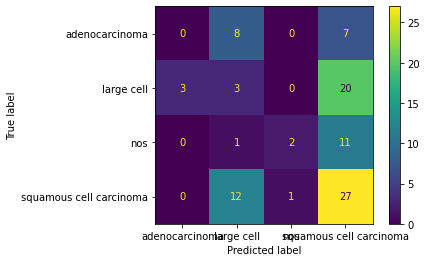

                         precision    recall  f1-score   support

             large cell       0.00      0.00      0.00        15
squamous cell carcinoma       0.12      0.12      0.12        26
         adenocarcinoma       0.67      0.14      0.24        14
                    nos       0.42      0.68      0.51        40

               accuracy                           0.34        95
              macro avg       0.30      0.23      0.22        95
           weighted avg       0.31      0.34      0.28        95



In [277]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report


plot_confusion_matrix(rf, X_test, y_test)
plt.show()

pred_softmax = rf.predict(X_test)
print(classification_report(y_test, pred_softmax, target_names=['large cell', 'squamous cell carcinoma', 'adenocarcinoma', 'nos']))

## SWM

In [278]:
# # ANOVA feature selection for numeric input and categorical output
# from sklearn.feature_selection import SelectKBest
# from sklearn.feature_selection import f_classif
#
# # define feature selection
# fs = SelectKBest(score_func=f_classif, k=20)
# # apply feature selection
# X_selected = fs.fit_transform(X_train, y_train)
# print(X_selected.shape)
# X_train = X_selected

In [279]:
# example of grid searching key hyperparameters for SVC
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
# define model and parameters
model = SVC()
kernel = ['poly', 'rbf', 'sigmoid']
C = [50, 10, 1.0, 0.1, 0.01]
gamma = ['scale']
# define grid search
grid = dict(kernel=kernel,C=C,gamma=gamma)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.398071 using {'C': 0.1, 'gamma': 'scale', 'kernel': 'sigmoid'}
0.393391 (0.024118) with: {'C': 50, 'gamma': 'scale', 'kernel': 'poly'}
0.372291 (0.042920) with: {'C': 50, 'gamma': 'scale', 'kernel': 'rbf'}
0.226683 (0.091938) with: {'C': 50, 'gamma': 'scale', 'kernel': 'sigmoid'}
0.393350 (0.017438) with: {'C': 10, 'gamma': 'scale', 'kernel': 'poly'}
0.381650 (0.027718) with: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
0.235140 (0.081082) with: {'C': 10, 'gamma': 'scale', 'kernel': 'sigmoid'}
0.393309 (0.013815) with: {'C': 1.0, 'gamma': 'scale', 'kernel': 'poly'}
0.385099 (0.020970) with: {'C': 1.0, 'gamma': 'scale', 'kernel': 'rbf'}
0.310837 (0.072198) with: {'C': 1.0, 'gamma': 'scale', 'kernel': 'sigmoid'}
0.393309 (0.013815) with: {'C': 0.1, 'gamma': 'scale', 'kernel': 'poly'}
0.395690 (0.009899) with: {'C': 0.1, 'gamma': 'scale', 'kernel': 'rbf'}
0.398071 (0.015593) with: {'C': 0.1, 'gamma': 'scale', 'kernel': 'sigmoid'}
0.393309 (0.013815) with: {'C': 0.01, 'gamma': 'sca

In [280]:
# linear = svm.SVC(kernel='linear', C=1, decision_function_shape='ovo').fit(X_train, y_train)
# rbf = svm.SVC(kernel='rbf', gamma=1, C=1, decision_function_shape='ovo').fit(X_train, y_train)
# poly = svm.SVC(kernel='poly', degree=3, C=1, decision_function_shape='ovo').fit(X_train, y_train)
# sig = svm.SVC(kernel='sigmoid', C=1, decision_function_shape='ovo').fit(X_train, y_train)

## SWM Regression for Survival.time

In [281]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

In [282]:
dum = pd.get_dummies(df_cancer)
dum

,original_shape_Elongation,original_shape_Flatness,original_shape_LeastAxisLength,original_shape_MajorAxisLength,original_shape_Maximum2DDiameterColumn,original_shape_Maximum2DDiameterRow,original_shape_Maximum2DDiameterSlice,original_shape_Maximum3DDiameter,original_shape_MeshVolume,original_shape_MinorAxisLength,...,Survival.time,deadstatus.event,Overall.Stage_I,Overall.Stage_II,Overall.Stage_IIIa,Overall.Stage_IIIb,Histology_adenocarcinoma,Histology_large cell,Histology_nos,Histology_squamous cell carcinoma
0,0.730057,0.547390,46.111107,84.238088,94.916393,82.904318,95.048181,95.453350,156058.192253,61.498644,...,2165,1,0,0,0,1,0,1,0,0
1,0.880026,0.755086,70.050510,92.771551,116.811054,101.661967,103.566608,125.188825,359165.698933,81.641365,...,155,1,1,0,0,0,0,0,0,1
2,0.541368,0.349893,25.216240,72.068431,56.708364,83.506157,62.535632,83.967822,34629.834720,39.015548,...,256,1,0,0,0,1,0,1,0,0
3,0.490820,0.287317,30.821869,107.274834,110.729228,110.003931,68.533539,117.543366,84214.687347,52.652619,...,141,1,0,1,0,0,0,0,0,1
4,0.710922,0.448589,35.245066,78.568642,77.737209,87.455405,85.094400,103.629893,83150.790783,55.856187,...,353,1,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
416,0.695675,0.500409,44.707095,89.341063,97.111157,103.503050,86.490585,111.438027,156388.878822,62.152351,...,648,1,0,0,0,1,0,0,0,1
417,0.956116,0.520980,40.251075,77.260243,101.965908,118.000536,145.900529,146.334346,94588.637352,73.869738,...,346,1,1,0,0,0,1,0,0,0
418,0.642440,0.497774,43.610094,87.610311,69.745562,108.443940,96.343719,109.304718,132211.446762,56.284411,...,2772,0,0,0,0,1,0,0,0,1
419,0.873311,0.683309,24.342849,35.624951,43.319309,41.255789,41.946741,43.713782,18872.380257,31.111663,...,2429,1,0,1,0,0,0,0,0,1


In [283]:
from sklearn.model_selection import train_test_split

X = dum.loc[:, dum.columns != 'Survival.time']
y = dum['Survival.time']


In [284]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

In [285]:
# Feature selection
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

pipeline = Pipeline([
                     ('scaler',StandardScaler()),
                     ('model',Lasso())
])

search = GridSearchCV(pipeline,
                      {'model__alpha':np.arange(0.1,10,0.1)},
                      cv = 5, scoring="neg_mean_squared_error",verbose=3
                      )
search.fit(X_train, y_train)

coefficients = search.best_estimator_.named_steps['model'].coef_

Fitting 5 folds for each of 99 candidates, totalling 495 fits
[CV 1/5] END ...............................model__alpha=0.1; total time=   0.0s
[CV 2/5] END ...............................model__alpha=0.1; total time=   0.0s
[CV 3/5] END ...............................model__alpha=0.1; total time=   0.0s
[CV 4/5] END ...............................model__alpha=0.1; total time=   0.0s
[CV 5/5] END ...............................model__alpha=0.1; total time=   0.0s
[CV 1/5] END ...............................model__alpha=0.2; total time=   0.0s
[CV 2/5] END ...............................model__alpha=0.2; total time=   0.0s


c:\users\loddo\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 24003786.174846794, tolerance: 16306.02305777778
  model = cd_fast.enet_coordinate_descent(
c:\users\loddo\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 24995239.37383783, tolerance: 18676.456893922652
  model = cd_fast.enet_coordinate_descent(
c:\users\loddo\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 24115391.812731102, tolerance: 16687.817876243098
  model = cd_fast.enet_coordinate_descent(
c:\users\loddo\app

[CV 3/5] END ...............................model__alpha=0.2; total time=   0.0s
[CV 4/5] END ...............................model__alpha=0.2; total time=   0.0s
[CV 5/5] END ...............................model__alpha=0.2; total time=   0.0s
[CV 1/5] END ...............model__alpha=0.30000000000000004; total time=   0.0s
[CV 2/5] END ...............model__alpha=0.30000000000000004; total time=   0.0s
[CV 3/5] END ...............model__alpha=0.30000000000000004; total time=   0.0s
[CV 4/5] END ...............model__alpha=0.30000000000000004; total time=   0.0s
[CV 5/5] END ...............model__alpha=0.30000000000000004; total time=   0.0s


c:\users\loddo\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 20910985.067013837, tolerance: 17040.657535911603
  model = cd_fast.enet_coordinate_descent(
c:\users\loddo\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 22240092.464687973, tolerance: 17853.574308287294
  model = cd_fast.enet_coordinate_descent(
c:\users\loddo\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 19498665.418535903, tolerance: 16306.02305777778
  model = cd_fast.enet_coordinate_descent(
c:\users\loddo\ap

[CV 1/5] END ...............................model__alpha=0.4; total time=   0.0s
[CV 2/5] END ...............................model__alpha=0.4; total time=   0.0s
[CV 3/5] END ...............................model__alpha=0.4; total time=   0.0s
[CV 4/5] END ...............................model__alpha=0.4; total time=   0.0s
[CV 5/5] END ...............................model__alpha=0.4; total time=   0.0s
[CV 1/5] END ...............................model__alpha=0.5; total time=   0.0s
[CV 2/5] END ...............................model__alpha=0.5; total time=   0.0s
[CV 3/5] END ...............................model__alpha=0.5; total time=   0.0s


c:\users\loddo\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 17873677.142497927, tolerance: 16687.817876243098
  model = cd_fast.enet_coordinate_descent(
c:\users\loddo\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 15966845.12780238, tolerance: 17040.657535911603
  model = cd_fast.enet_coordinate_descent(
c:\users\loddo\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 15258001.115630388, tolerance: 17853.574308287294
  model = cd_fast.enet_coordinate_descent(
c:\users\loddo\ap

[CV 4/5] END ...............................model__alpha=0.5; total time=   0.0s
[CV 5/5] END ...............................model__alpha=0.5; total time=   0.0s
[CV 1/5] END ...............................model__alpha=0.6; total time=   0.0s
[CV 2/5] END ...............................model__alpha=0.6; total time=   0.0s
[CV 3/5] END ...............................model__alpha=0.6; total time=   0.0s
[CV 4/5] END ...............................model__alpha=0.6; total time=   0.0s
[CV 5/5] END ...............................model__alpha=0.6; total time=   0.0s
[CV 1/5] END ................model__alpha=0.7000000000000001; total time=   0.0s
[CV 2/5] END ................model__alpha=0.7000000000000001; total time=   0.0s


c:\users\loddo\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 15369024.551459998, tolerance: 18676.456893922652
  model = cd_fast.enet_coordinate_descent(
c:\users\loddo\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 13575206.00438165, tolerance: 16687.817876243098
  model = cd_fast.enet_coordinate_descent(
c:\users\loddo\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11227325.650528189, tolerance: 17040.657535911603
  model = cd_fast.enet_coordinate_descent(
c:\users\loddo\ap

[CV 3/5] END ................model__alpha=0.7000000000000001; total time=   0.0s
[CV 4/5] END ................model__alpha=0.7000000000000001; total time=   0.0s
[CV 5/5] END ................model__alpha=0.7000000000000001; total time=   0.0s
[CV 1/5] END ...............................model__alpha=0.8; total time=   0.0s
[CV 2/5] END ...............................model__alpha=0.8; total time=   0.0s
[CV 3/5] END ...............................model__alpha=0.8; total time=   0.0s
[CV 4/5] END ...............................model__alpha=0.8; total time=   0.0s
[CV 5/5] END ...............................model__alpha=0.8; total time=   0.0s
[CV 1/5] END ...............................model__alpha=0.9; total time=   0.0s

c:\users\loddo\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6977297.329544645, tolerance: 16306.02305777778
  model = cd_fast.enet_coordinate_descent(
c:\users\loddo\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11471729.243151318, tolerance: 18676.456893922652
  model = cd_fast.enet_coordinate_descent(
c:\users\loddo\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11117884.42643848, tolerance: 16687.817876243098
  model = cd_fast.enet_coordinate_descent(
c:\users\loddo\appd


[CV 2/5] END ...............................model__alpha=0.9; total time=   0.0s
[CV 3/5] END ...............................model__alpha=0.9; total time=   0.0s
[CV 4/5] END ...............................model__alpha=0.9; total time=   0.0s
[CV 5/5] END ...............................model__alpha=0.9; total time=   0.0s
[CV 1/5] END ...............................model__alpha=1.0; total time=   0.0s
[CV 2/5] END ...............................model__alpha=1.0; total time=   0.0s
[CV 3/5] END ...............................model__alpha=1.0; total time=   0.0s


c:\users\loddo\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3518225.481760241, tolerance: 17853.574308287294
  model = cd_fast.enet_coordinate_descent(
c:\users\loddo\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6601392.0874879025, tolerance: 16306.02305777778
  model = cd_fast.enet_coordinate_descent(
c:\users\loddo\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7205396.99199672, tolerance: 18676.456893922652
  model = cd_fast.enet_coordinate_descent(
c:\users\loddo\appda

[CV 4/5] END ...............................model__alpha=1.0; total time=   0.0s
[CV 5/5] END ...............................model__alpha=1.0; total time=   0.0s
[CV 1/5] END ...............................model__alpha=1.1; total time=   0.0s
[CV 2/5] END ...............................model__alpha=1.1; total time=   0.0s
[CV 3/5] END ...............................model__alpha=1.1; total time=   0.0s
[CV 4/5] END ...............................model__alpha=1.1; total time=   0.0s
[CV 5/5] END ...............................model__alpha=1.1; total time=   0.0s
[CV 1/5] END ................model__alpha=1.2000000000000002; total time=   0.0s
[CV 2/5] END ................model__alpha=1.2000000000000002; total time=   0.0s


c:\users\loddo\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10040749.743602611, tolerance: 17040.657535911603
  model = cd_fast.enet_coordinate_descent(
c:\users\loddo\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4081758.1119212657, tolerance: 17853.574308287294
  model = cd_fast.enet_coordinate_descent(
c:\users\loddo\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6430539.465079661, tolerance: 16306.02305777778
  model = cd_fast.enet_coordinate_descent(
c:\users\loddo\app

[CV 3/5] END ................model__alpha=1.2000000000000002; total time=   0.0s
[CV 4/5] END ................model__alpha=1.2000000000000002; total time=   0.0s
[CV 5/5] END ................model__alpha=1.2000000000000002; total time=   0.0s
[CV 1/5] END ................model__alpha=1.3000000000000003; total time=   0.0s
[CV 2/5] END ................model__alpha=1.3000000000000003; total time=   0.0s
[CV 3/5] END ................model__alpha=1.3000000000000003; total time=   0.0s
[CV 4/5] END ................model__alpha=1.3000000000000003; total time=   0.0s
[CV 5/5] END ................model__alpha=1.3000000000000003; total time=   0.0s
[CV 1/5] END ................model__alpha=1.4000000000000001; total time=   0.0s
[CV 2/5] END ................model__alpha=1.4000000000000001; total time=   0.0s

c:\users\loddo\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7536390.868855812, tolerance: 16687.817876243098
  model = cd_fast.enet_coordinate_descent(
c:\users\loddo\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10590118.81018335, tolerance: 17040.657535911603
  model = cd_fast.enet_coordinate_descent(
c:\users\loddo\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5149906.947414368, tolerance: 17853.574308287294
  model = cd_fast.enet_coordinate_descent(
c:\users\loddo\appd


[CV 3/5] END ................model__alpha=1.4000000000000001; total time=   0.0s
[CV 4/5] END ................model__alpha=1.4000000000000001; total time=   0.0s
[CV 5/5] END ................model__alpha=1.4000000000000001; total time=   0.0s
[CV 1/5] END ................model__alpha=1.5000000000000002; total time=   0.0s
[CV 2/5] END ................model__alpha=1.5000000000000002; total time=   0.0s
[CV 3/5] END ................model__alpha=1.5000000000000002; total time=   0.0s
[CV 4/5] END ................model__alpha=1.5000000000000002; total time=   0.0s
[CV 5/5] END ................model__alpha=1.5000000000000002; total time=   0.0s


c:\users\loddo\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8102480.850047398, tolerance: 16687.817876243098
  model = cd_fast.enet_coordinate_descent(
c:\users\loddo\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9078660.340832874, tolerance: 17040.657535911603
  model = cd_fast.enet_coordinate_descent(
c:\users\loddo\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5682525.338156536, tolerance: 17853.574308287294
  model = cd_fast.enet_coordinate_descent(
c:\users\loddo\appd

[CV 1/5] END ...............................model__alpha=1.6; total time=   0.0s
[CV 2/5] END ...............................model__alpha=1.6; total time=   0.0s
[CV 3/5] END ...............................model__alpha=1.6; total time=   0.0s
[CV 4/5] END ...............................model__alpha=1.6; total time=   0.0s
[CV 5/5] END ...............................model__alpha=1.6; total time=   0.0s
[CV 1/5] END ................model__alpha=1.7000000000000002; total time=   0.0s
[CV 2/5] END ................model__alpha=1.7000000000000002; total time=   0.0s
[CV 3/5] END ................model__alpha=1.7000000000000002; total time=   0.0s
[CV 4/5] END ................model__alpha=1.7000000000000002; total time=   0.0s


c:\users\loddo\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8078179.802775063, tolerance: 18676.456893922652
  model = cd_fast.enet_coordinate_descent(
c:\users\loddo\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6197132.212494209, tolerance: 16687.817876243098
  model = cd_fast.enet_coordinate_descent(
c:\users\loddo\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5702860.659940757, tolerance: 17040.657535911603
  model = cd_fast.enet_coordinate_descent(
c:\users\loddo\appd

[CV 5/5] END ................model__alpha=1.7000000000000002; total time=   0.0s
[CV 1/5] END ................model__alpha=1.8000000000000003; total time=   0.0s
[CV 2/5] END ................model__alpha=1.8000000000000003; total time=   0.0s
[CV 3/5] END ................model__alpha=1.8000000000000003; total time=   0.0s
[CV 4/5] END ................model__alpha=1.8000000000000003; total time=   0.0s
[CV 5/5] END ................model__alpha=1.8000000000000003; total time=   0.0s
[CV 1/5] END ................model__alpha=1.9000000000000001; total time=   0.0s
[CV 2/5] END ................model__alpha=1.9000000000000001; total time=   0.0s
[CV 3/5] END ................model__alpha=1.9000000000000001; total time=   0.0s

c:\users\loddo\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7949507.535201974, tolerance: 18676.456893922652
  model = cd_fast.enet_coordinate_descent(
c:\users\loddo\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4187059.933136247, tolerance: 16687.817876243098
  model = cd_fast.enet_coordinate_descent(
c:\users\loddo\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2471007.1753747687, tolerance: 17040.657535911603
  model = cd_fast.enet_coordinate_descent(
c:\users\loddo\app


[CV 4/5] END ................model__alpha=1.9000000000000001; total time=   0.0s
[CV 5/5] END ................model__alpha=1.9000000000000001; total time=   0.0s
[CV 1/5] END ...............................model__alpha=2.0; total time=   0.0s
[CV 2/5] END ...............................model__alpha=2.0; total time=   0.0s
[CV 3/5] END ...............................model__alpha=2.0; total time=   0.0s
[CV 4/5] END ...............................model__alpha=2.0; total time=   0.0s
[CV 5/5] END ...............................model__alpha=2.0; total time=   0.0s
[CV 1/5] END ...............................model__alpha=2.1; total time=   0.0s


c:\users\loddo\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7191975.085385002, tolerance: 16306.02305777778
  model = cd_fast.enet_coordinate_descent(
c:\users\loddo\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4380955.539878175, tolerance: 18676.456893922652
  model = cd_fast.enet_coordinate_descent(
c:\users\loddo\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3340006.8539892063, tolerance: 16687.817876243098
  model = cd_fast.enet_coordinate_descent(
c:\users\loddo\appd

[CV 2/5] END ...............................model__alpha=2.1; total time=   0.0s
[CV 3/5] END ...............................model__alpha=2.1; total time=   0.0s
[CV 4/5] END ...............................model__alpha=2.1; total time=   0.0s
[CV 5/5] END ...............................model__alpha=2.1; total time=   0.0s
[CV 1/5] END ...............................model__alpha=2.2; total time=   0.0s
[CV 2/5] END ...............................model__alpha=2.2; total time=   0.0s
[CV 3/5] END ...............................model__alpha=2.2; total time=   0.0s
[CV 4/5] END ...............................model__alpha=2.2; total time=   0.0s
[CV 5/5] END ...............................model__alpha=2.2; total time=   0.0s


c:\users\loddo\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1040778.2661545947, tolerance: 17853.574308287294
  model = cd_fast.enet_coordinate_descent(
c:\users\loddo\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6817487.025501959, tolerance: 16306.02305777778
  model = cd_fast.enet_coordinate_descent(
c:\users\loddo\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1959409.923611492, tolerance: 18676.456893922652
  model = cd_fast.enet_coordinate_descent(
c:\users\loddo\appd

[CV 1/5] END ................model__alpha=2.3000000000000003; total time=   0.0s
[CV 2/5] END ................model__alpha=2.3000000000000003; total time=   0.0s
[CV 3/5] END ................model__alpha=2.3000000000000003; total time=   0.0s
[CV 4/5] END ................model__alpha=2.3000000000000003; total time=   0.0s
[CV 5/5] END ................model__alpha=2.3000000000000003; total time=   0.0s
[CV 1/5] END ................model__alpha=2.4000000000000004; total time=   0.0s
[CV 2/5] END ................model__alpha=2.4000000000000004; total time=   0.0s
[CV 3/5] END ................model__alpha=2.4000000000000004; total time=   0.0s
[CV 4/5] END ................model__alpha=2.4000000000000004; total time=   0.0s
[CV 5/5] END ................model__alpha=2.4000000000000004; total time=   0.0s

c:\users\loddo\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1572464.8954923898, tolerance: 17040.657535911603
  model = cd_fast.enet_coordinate_descent(
c:\users\loddo\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 474949.76864263415, tolerance: 17853.574308287294
  model = cd_fast.enet_coordinate_descent(
c:\users\loddo\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5464035.412225835, tolerance: 16306.02305777778
  model = cd_fast.enet_coordinate_descent(
c:\users\loddo\app


[CV 1/5] END ................model__alpha=2.5000000000000004; total time=   0.0s
[CV 2/5] END ................model__alpha=2.5000000000000004; total time=   0.0s
[CV 3/5] END ................model__alpha=2.5000000000000004; total time=   0.0s
[CV 4/5] END ................model__alpha=2.5000000000000004; total time=   0.0s
[CV 5/5] END ................model__alpha=2.5000000000000004; total time=   0.0s
[CV 1/5] END ...............................model__alpha=2.6; total time=   0.0s
[CV 2/5] END ...............................model__alpha=2.6; total time=   0.0s
[CV 3/5] END ...............................model__alpha=2.6; total time=   0.0s
[CV 4/5] END ...............................model__alpha=2.6; total time=   0.0s


c:\users\loddo\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1233065.6404717192, tolerance: 17040.657535911603
  model = cd_fast.enet_coordinate_descent(
c:\users\loddo\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 277649.0908472687, tolerance: 17853.574308287294
  model = cd_fast.enet_coordinate_descent(
c:\users\loddo\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4577168.1577859, tolerance: 16306.02305777778
  model = cd_fast.enet_coordinate_descent(
c:\users\loddo\appdat

[CV 5/5] END ...............................model__alpha=2.6; total time=   0.0s
[CV 1/5] END ...............................model__alpha=2.7; total time=   0.0s
[CV 2/5] END ...............................model__alpha=2.7; total time=   0.0s
[CV 3/5] END ...............................model__alpha=2.7; total time=   0.0s
[CV 4/5] END ...............................model__alpha=2.7; total time=   0.0s
[CV 5/5] END ...............................model__alpha=2.7; total time=   0.0s
[CV 1/5] END ................model__alpha=2.8000000000000003; total time=   0.0s
[CV 2/5] END ................model__alpha=2.8000000000000003; total time=   0.0s
[CV 3/5] END ................model__alpha=2.8000000000000003; total time=   0.0s
[CV 4/5] END ................model__alpha=2.8000000000000003; total time=   0.0s


c:\users\loddo\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 102665.57692153752, tolerance: 17853.574308287294
  model = cd_fast.enet_coordinate_descent(
c:\users\loddo\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3266075.8508995846, tolerance: 16306.02305777778
  model = cd_fast.enet_coordinate_descent(
c:\users\loddo\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1670330.0784729347, tolerance: 18676.456893922652
  model = cd_fast.enet_coordinate_descent(
c:\users\loddo\ap

[CV 5/5] END ................model__alpha=2.8000000000000003; total time=   0.0s
[CV 1/5] END ................model__alpha=2.9000000000000004; total time=   0.0s
[CV 2/5] END ................model__alpha=2.9000000000000004; total time=   0.0s
[CV 3/5] END ................model__alpha=2.9000000000000004; total time=   0.0s
[CV 4/5] END ................model__alpha=2.9000000000000004; total time=   0.0s
[CV 5/5] END ................model__alpha=2.9000000000000004; total time=   0.0s
[CV 1/5] END ................model__alpha=3.0000000000000004; total time=   0.0s
[CV 2/5] END ................model__alpha=3.0000000000000004; total time=   0.0s
[CV 3/5] END ................model__alpha=3.0000000000000004; total time=   0.0s

c:\users\loddo\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 19820.417942091823, tolerance: 17040.657535911603
  model = cd_fast.enet_coordinate_descent(
c:\users\loddo\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 47996.2898593992, tolerance: 17853.574308287294
  model = cd_fast.enet_coordinate_descent(
c:\users\loddo\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 921639.1474218965, tolerance: 16306.02305777778
  model = cd_fast.enet_coordinate_descent(
c:\users\loddo\appda


[CV 4/5] END ................model__alpha=3.0000000000000004; total time=   0.0s
[CV 5/5] END ................model__alpha=3.0000000000000004; total time=   0.0s
[CV 1/5] END ...............................model__alpha=3.1; total time=   0.0s
[CV 2/5] END ...............................model__alpha=3.1; total time=   0.0s
[CV 3/5] END ...............................model__alpha=3.1; total time=   0.0s
[CV 4/5] END ...............................model__alpha=3.1; total time=   0.0s


c:\users\loddo\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 33747.31545436382, tolerance: 17853.574308287294
  model = cd_fast.enet_coordinate_descent(
c:\users\loddo\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 618196.2794236392, tolerance: 16306.02305777778
  model = cd_fast.enet_coordinate_descent(
c:\users\loddo\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 576080.6651633456, tolerance: 18676.456893922652
  model = cd_fast.enet_coordinate_descent(
c:\users\loddo\appda

[CV 5/5] END ...............................model__alpha=3.1; total time=   0.0s
[CV 1/5] END ...............................model__alpha=3.2; total time=   0.0s
[CV 2/5] END ...............................model__alpha=3.2; total time=   0.0s
[CV 3/5] END ...............................model__alpha=3.2; total time=   0.0s
[CV 4/5] END ...............................model__alpha=3.2; total time=   0.0s
[CV 5/5] END ...............................model__alpha=3.2; total time=   0.0s
[CV 1/5] END ................model__alpha=3.3000000000000003; total time=   0.0s
[CV 2/5] END ................model__alpha=3.3000000000000003; total time=   0.0s
[CV 3/5] END ................model__alpha=3.3000000000000003; total time=   0.0s
[CV 4/5] END ................model__alpha=3.3000000000000003; total time=   0.0s
[CV 5/5] END ................model__alpha=3.3000000000000003; total time=   0.0s
[CV 1/5] END ................model__alpha=3.4000000000000004; total time=   0.0s
[CV 2/5] END ...............

c:\users\loddo\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 382340.365010038, tolerance: 18676.456893922652
  model = cd_fast.enet_coordinate_descent(
c:\users\loddo\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 414229.23604588956, tolerance: 16687.817876243098
  model = cd_fast.enet_coordinate_descent(
c:\users\loddo\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 30335.122005715966, tolerance: 17853.574308287294
  model = cd_fast.enet_coordinate_descent(
c:\users\loddo\app

[CV 5/5] END ................model__alpha=3.4000000000000004; total time=   0.0s
[CV 1/5] END ................model__alpha=3.5000000000000004; total time=   0.0s
[CV 2/5] END ................model__alpha=3.5000000000000004; total time=   0.0s
[CV 3/5] END ................model__alpha=3.5000000000000004; total time=   0.0s
[CV 4/5] END ................model__alpha=3.5000000000000004; total time=   0.0s
[CV 5/5] END ................model__alpha=3.5000000000000004; total time=   0.0s


c:\users\loddo\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 250317.72818937153, tolerance: 16306.02305777778
  model = cd_fast.enet_coordinate_descent(
c:\users\loddo\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 46560.05647601187, tolerance: 18676.456893922652
  model = cd_fast.enet_coordinate_descent(
c:\users\loddo\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 117569.39008301497, tolerance: 16687.817876243098
  model = cd_fast.enet_coordinate_descent(
c:\users\loddo\app

[CV 1/5] END ...............................model__alpha=3.6; total time=   0.0s
[CV 2/5] END ...............................model__alpha=3.6; total time=   0.0s
[CV 3/5] END ...............................model__alpha=3.6; total time=   0.0s
[CV 4/5] END ...............................model__alpha=3.6; total time=   0.0s
[CV 5/5] END ...............................model__alpha=3.6; total time=   0.0s
[CV 1/5] END ...............................model__alpha=3.7; total time=   0.0s
[CV 2/5] END ...............................model__alpha=3.7; total time=   0.0s
[CV 3/5] END ...............................model__alpha=3.7; total time=   0.0s
[CV 4/5] END ...............................model__alpha=3.7; total time=   0.0s
[CV 5/5] END ...............................model__alpha=3.7; total time=   0.0s
[CV 1/5] END ................model__alpha=3.8000000000000003; total time=   0.0s
[CV 2/5] END ................model__alpha=3.8000000000000003; total time=   0.0s
[CV 3/5] END ...............

c:\users\loddo\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 96330.72084461153, tolerance: 16687.817876243098
  model = cd_fast.enet_coordinate_descent(
c:\users\loddo\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 116611.3238792941, tolerance: 16306.02305777778
  model = cd_fast.enet_coordinate_descent(
c:\users\loddo\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 61890.996808514, tolerance: 18676.456893922652
  model = cd_fast.enet_coordinate_descent(
c:\users\loddo\appdata


[CV 4/5] END ................model__alpha=3.8000000000000003; total time=   0.0s
[CV 5/5] END ................model__alpha=3.8000000000000003; total time=   0.0s
[CV 1/5] END ................model__alpha=3.9000000000000004; total time=   0.0s
[CV 2/5] END ................model__alpha=3.9000000000000004; total time=   0.0s
[CV 3/5] END ................model__alpha=3.9000000000000004; total time=   0.0s
[CV 4/5] END ................model__alpha=3.9000000000000004; total time=   0.0s


c:\users\loddo\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 75607.79202307016, tolerance: 16306.02305777778
  model = cd_fast.enet_coordinate_descent(
c:\users\loddo\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 50883.87277956307, tolerance: 18676.456893922652
  model = cd_fast.enet_coordinate_descent(
c:\users\loddo\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 69551.5140773654, tolerance: 16687.817876243098
  model = cd_fast.enet_coordinate_descent(
c:\users\loddo\appdat

[CV 5/5] END ................model__alpha=3.9000000000000004; total time=   0.0s
[CV 1/5] END ...............................model__alpha=4.0; total time=   0.0s
[CV 2/5] END ...............................model__alpha=4.0; total time=   0.0s
[CV 3/5] END ...............................model__alpha=4.0; total time=   0.0s
[CV 4/5] END ...............................model__alpha=4.0; total time=   0.0s
[CV 5/5] END ...............................model__alpha=4.0; total time=   0.0s


c:\users\loddo\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 59230.26902589202, tolerance: 16687.817876243098
  model = cd_fast.enet_coordinate_descent(
c:\users\loddo\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 39643.38337953389, tolerance: 16306.02305777778
  model = cd_fast.enet_coordinate_descent(
c:\users\loddo\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 32748.528230130672, tolerance: 18676.456893922652
  model = cd_fast.enet_coordinate_descent(
c:\users\loddo\appd

[CV 1/5] END ...............................model__alpha=4.1; total time=   0.0s
[CV 2/5] END ...............................model__alpha=4.1; total time=   0.0s
[CV 3/5] END ...............................model__alpha=4.1; total time=   0.0s
[CV 4/5] END ...............................model__alpha=4.1; total time=   0.0s
[CV 5/5] END ...............................model__alpha=4.1; total time=   0.0s
[CV 1/5] END ...............................model__alpha=4.2; total time=   0.0s


c:\users\loddo\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 29621.270796611905, tolerance: 16306.02305777778
  model = cd_fast.enet_coordinate_descent(
c:\users\loddo\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 26895.174504458904, tolerance: 18676.456893922652
  model = cd_fast.enet_coordinate_descent(
c:\users\loddo\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 40263.59911723435, tolerance: 16687.817876243098
  model = cd_fast.enet_coordinate_descent(
c:\users\loddo\app

[CV 2/5] END ...............................model__alpha=4.2; total time=   0.0s
[CV 3/5] END ...............................model__alpha=4.2; total time=   0.0s
[CV 4/5] END ...............................model__alpha=4.2; total time=   0.0s
[CV 5/5] END ...............................model__alpha=4.2; total time=   0.0s
[CV 1/5] END ...............................model__alpha=4.3; total time=   0.0s
[CV 2/5] END ...............................model__alpha=4.3; total time=   0.0s


c:\users\loddo\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 31592.99944280088, tolerance: 16687.817876243098
  model = cd_fast.enet_coordinate_descent(
c:\users\loddo\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 23485.508751645684, tolerance: 16687.817876243098
  model = cd_fast.enet_coordinate_descent(


[CV 3/5] END ...............................model__alpha=4.3; total time=   0.0s
[CV 4/5] END ...............................model__alpha=4.3; total time=   0.0s
[CV 5/5] END ...............................model__alpha=4.3; total time=   0.0s
[CV 1/5] END ................model__alpha=4.3999999999999995; total time=   0.0s
[CV 2/5] END ................model__alpha=4.3999999999999995; total time=   0.0s
[CV 3/5] END ................model__alpha=4.3999999999999995; total time=   0.0s
[CV 4/5] END ................model__alpha=4.3999999999999995; total time=   0.0s
[CV 5/5] END ................model__alpha=4.3999999999999995; total time=   0.0s
[CV 1/5] END ...............................model__alpha=4.5; total time=   0.0s
[CV 2/5] END ...............................model__alpha=4.5; total time=   0.0s
[CV 3/5] END ...............................model__alpha=4.5; total time=   0.0s
[CV 4/5] END ...............................model__alpha=4.5; total time=   0.0s
[CV 5/5] END ...............

In [291]:
importance = np.abs(coefficients)
relevant_features = np.array(X_train.columns)[importance > 0]
not_relevant_features = np.array(X_train.columns)[importance == 0]
relevant_features

array(['original_shape_MajorAxisLength',
       'original_shape_Maximum2DDiameterRow',
       'original_shape_Maximum2DDiameterSlice',
       'original_shape_SurfaceArea', 'original_shape_SurfaceVolumeRatio',
       'original_firstorder_10Percentile', 'original_firstorder_Kurtosis',
       'original_firstorder_Maximum', 'original_firstorder_Minimum',
       'original_firstorder_TotalEnergy', 'original_glcm_Contrast',
       'original_glcm_Correlation', 'original_glcm_DifferenceVariance',
       'original_glcm_Imc1', 'original_glcm_Imc2',
       'original_glcm_InverseVariance',
       'original_glrlm_LongRunHighGrayLevelEmphasis',
       'original_glrlm_LongRunLowGrayLevelEmphasis',
       'original_glrlm_RunVariance',
       'original_glszm_GrayLevelNonUniformityNormalized',
       'original_glszm_LargeAreaLowGrayLevelEmphasis',
       'original_glszm_LowGrayLevelZoneEmphasis',
       'original_glszm_SmallAreaLowGrayLevelEmphasis',
       'original_gldm_DependenceNonUniformityNormalize

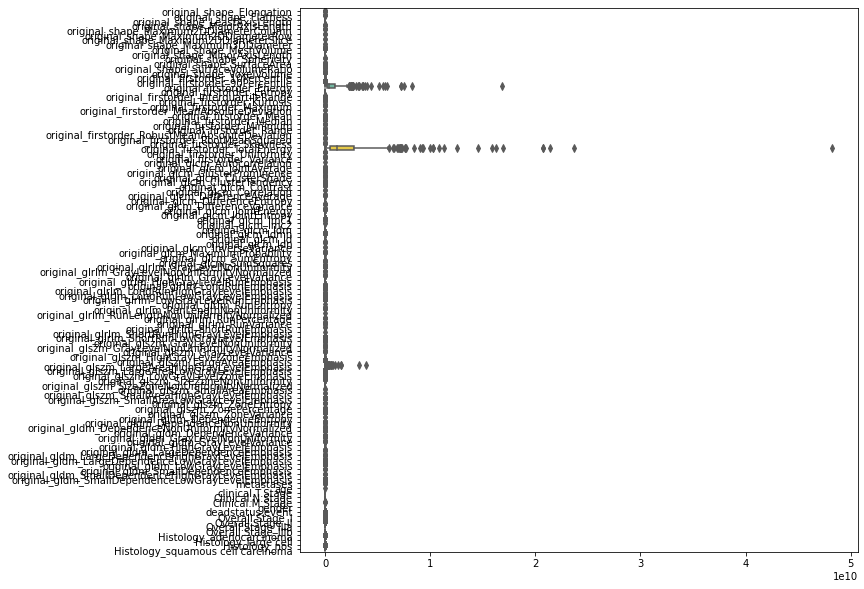

In [287]:
## variables distribution visualization
plt.figure(figsize=(10,10))
ax = sns.boxplot(data=X, orient="h", palette="Set2")

In [288]:
## Check the presence and eventually handle outliers

from scipy import stats
len(X[(np.abs(stats.zscore(X)) > 2.5).all(axis = 1)])

0

In [294]:
# selected_feat = X_train.columns[(sel_.get_support())]
# print('total features: {}'.format((X_train.shape[1])))
# print('selected features: {}'.format(len(selected_feat)))
# print('features with coefficients shrank to zero: {}'.format(np.sum(sel_.estimator_.coef_ == 0)))
X[relevant_features]

,original_shape_MajorAxisLength,original_shape_Maximum2DDiameterRow,original_shape_Maximum2DDiameterSlice,original_shape_SurfaceArea,original_shape_SurfaceVolumeRatio,original_firstorder_10Percentile,original_firstorder_Kurtosis,original_firstorder_Maximum,original_firstorder_Minimum,original_firstorder_TotalEnergy,...,clinical.T.Stage,Clinical.N.Stage,Clinical.M.Stage,gender,deadstatus.event,Overall.Stage_I,Overall.Stage_II,Overall.Stage_IIIb,Histology_adenocarcinoma,Histology_large cell
0,84.238088,82.904318,95.048181,23285.252363,0.149209,-343.0,8.980163,1040.0,-1021.0,7.075983e+09,...,2.0,3,0,1,1,0,0,1,0,1
1,92.771551,101.661967,103.566608,35514.840842,0.098881,-451.0,6.448380,719.0,-1024.0,2.074191e+10,...,2.0,0,0,1,1,1,0,0,0,0
2,72.068431,83.506157,62.535632,9266.764682,0.267595,-544.0,3.236057,230.0,-961.0,2.523862e+09,...,2.0,3,0,1,1,0,0,1,0,1
3,107.274834,110.003931,68.533539,19074.755133,0.226502,-249.0,9.850208,607.0,-994.0,2.502676e+09,...,2.0,1,0,1,1,0,1,0,0,0
4,78.568642,87.455405,85.094400,19620.212293,0.235959,-173.0,13.978412,2621.0,-1024.0,2.940929e+09,...,4.0,2,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
416,89.341063,103.503050,86.490585,23548.613953,0.150577,-23.0,36.809286,233.0,-885.0,1.081202e+09,...,4.0,2,0,1,1,0,0,1,0,0
417,77.260243,118.000536,145.900529,17533.004808,0.185361,-195.0,40.181917,2806.0,-1024.0,2.556599e+09,...,2.0,0,0,1,1,1,0,0,1,0
418,87.610311,108.443940,96.343719,21772.755666,0.164681,-170.0,14.041251,279.0,-1010.0,2.417046e+09,...,4.0,1,0,1,0,0,0,1,0,0
419,35.624951,41.255789,41.946741,4525.914411,0.239817,-353.0,5.314272,138.0,-864.0,6.522703e+08,...,2.0,1,0,1,1,0,1,0,0,0


In [298]:
regressor = SVR()
regressor.fit(X_train[relevant_features],y_train)

SVR()

In [299]:
y_predict = regressor.predict(X_test[relevant_features])

In [300]:
print("test MSE={}".format(mean_squared_error(y_test, y_predict)))
print("test R2={}".format(r2_score(y_test, y_predict)))

print("train MSE={}".format(mean_squared_error(y_train, regressor.predict(X_train))))
print("train R2={}".format(r2_score(y_train, regressor.predict(X_train))))

test MSE=1433588.4103199309
test R2=-0.23628226743156877


ValueError: X.shape[1] = 115 should be equal to 39, the number of features at training time